In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

import re
import os

In [4]:
df_title = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datatone/final_title.csv").reset_index(drop=True).drop_duplicates(subset=['Platform', 'id'])
df_credit = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datatone/final_credit.csv").reset_index(drop=True).drop_duplicates(subset=['Platform', 'id'])

df_title.head()

,Unnamed: 0,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Platform
0,0,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,G,120,"['animation', 'family', 'music', 'fantasy']",['US'],0.0,tt0032455,7.7,94681.0,57.751,7.4,Disney plus
1,1,tm67803,Snow White and the Seven Dwarfs,MOVIE,"A beautiful girl, Snow White, takes refuge in ...",1937,G,83,"['fantasy', 'family', 'romance', 'animation', ...",['US'],0.0,tt0029583,7.6,195321.0,107.137,7.1,Disney plus
2,2,tm82546,Pinocchio,MOVIE,Lonely toymaker Geppetto has his wishes answer...,1940,G,88,"['animation', 'comedy', 'family', 'fantasy']",['US'],0.0,tt0032910,7.5,141937.0,71.160,7.1,Disney plus
3,3,tm79357,Bambi,MOVIE,Bambi's tale unfolds from season to season as ...,1942,G,70,"['animation', 'drama', 'family']",['US'],0.0,tt0034492,7.3,140406.0,68.136,7.0,Disney plus
4,4,tm62671,Treasure Island,MOVIE,Enchanted by the idea of locating treasure bur...,1950,PG,96,"['family', 'action']","['GB', 'US']",0.0,tt0043067,6.9,8229.0,10.698,6.5,Disney plus


In [5]:
df_credit.head()

,Unnamed: 0,person_id,id,name,character,role,Platform
0,0,23433,tm74391,Deems Taylor,Narrator - Narrative Introductions,ACTOR,Disney plus
16,16,6134,tm67803,Adriana Caselotti,Snow White (voice) (uncredited),ACTOR,Disney plus
30,30,27198,tm82546,Dickie Jones,Pinocchio / Alexander (voice) (uncredited),ACTOR,Disney plus
51,51,97871,tm79357,Donnie Dunagan,Young Bambi (voice) (uncredited),ACTOR,Disney plus
66,66,40975,tm62671,Bobby Driscoll,Jim Hawkins,ACTOR,Disney plus


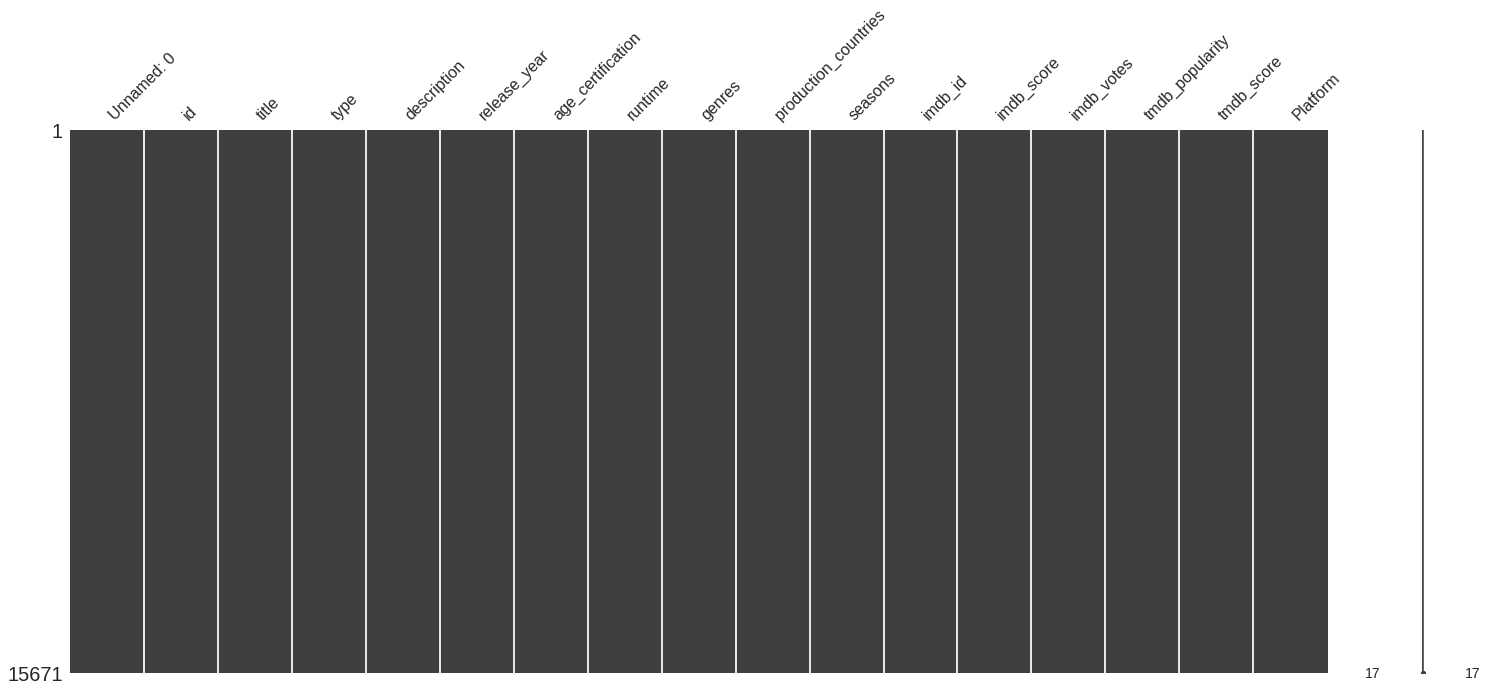

In [6]:
msno.matrix(df_title)

<Figure size 720x720 with 0 Axes>

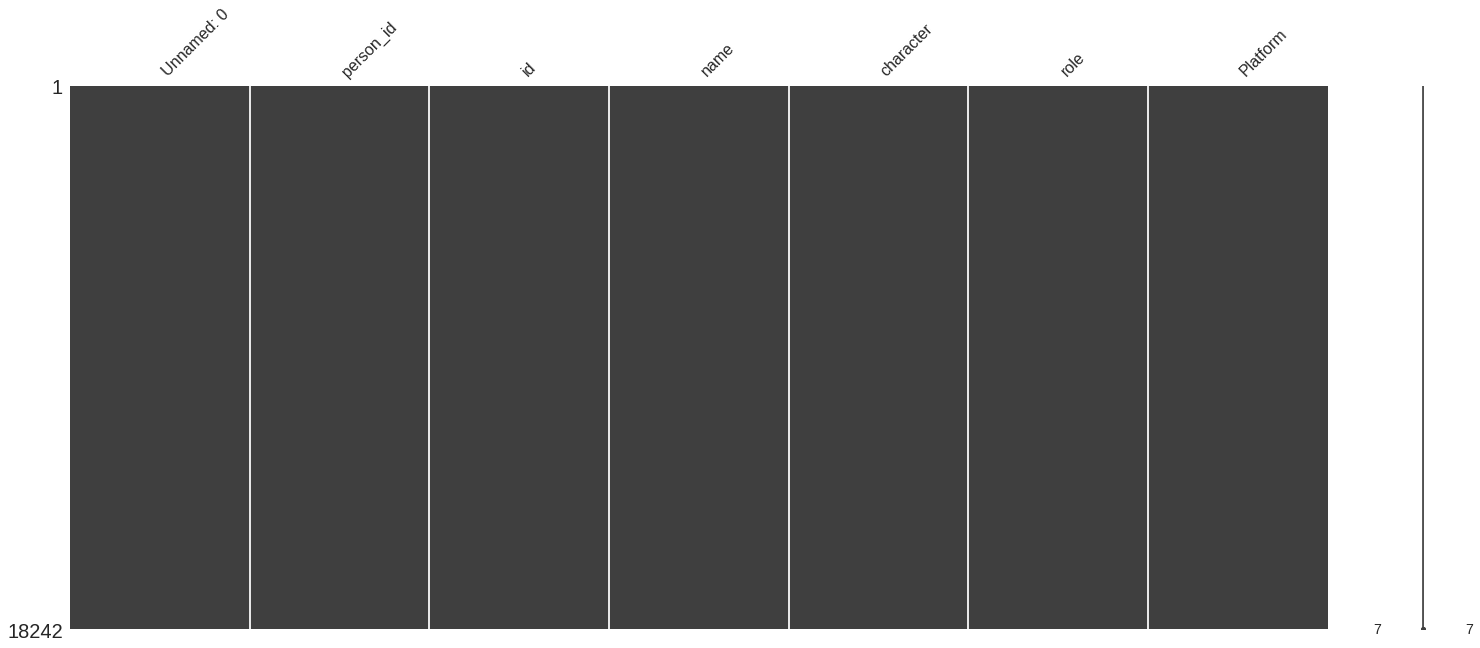

In [7]:
plt.figure(figsize=(10,10))
msno.matrix(df_credit)

In [8]:
df_title.columns

Index(['Unnamed: 0', 'id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'Platform'],
      dtype='object')

In [9]:
df_credit.head()

,Unnamed: 0,person_id,id,name,character,role,Platform
0,0,23433,tm74391,Deems Taylor,Narrator - Narrative Introductions,ACTOR,Disney plus
16,16,6134,tm67803,Adriana Caselotti,Snow White (voice) (uncredited),ACTOR,Disney plus
30,30,27198,tm82546,Dickie Jones,Pinocchio / Alexander (voice) (uncredited),ACTOR,Disney plus
51,51,97871,tm79357,Donnie Dunagan,Young Bambi (voice) (uncredited),ACTOR,Disney plus
66,66,40975,tm62671,Bobby Driscoll,Jim Hawkins,ACTOR,Disney plus


In [10]:
del df_title["Unnamed: 0"]

In [11]:
del df_credit["Unnamed: 0"]

In [12]:
len(df_title.columns)

16

In [13]:
len(df_credit.columns)

6

In [14]:
df_title.shape

(15671, 16)

In [15]:
df_title['id'].nunique()

14087

In [16]:
df_title['id'].unique()

array(['tm74391', 'tm67803', 'tm82546', ..., 'tm1098070', 'tm1019060',
       'tm822572'], dtype=object)

In [17]:
platforms = ['Netflix', 'Amazon', 'Disney plus', 'Paramount']

In [18]:
for platform in platforms:
  print((df_title['Platform'] == platform).sum())

5041
7316
1057
2257


In [19]:
set_uni_id = []
uni_plat = []

for platform in platforms:
  df_masked = df_title[df_title['Platform'] == platform]

  tmp = set(df_masked['id'])
  other = set(df_title[df_title['Platform'] != platform]['id'])

  diff = tmp - other
  set_uni_id.append(np.array(list(diff)))

  a = df_masked[df_masked['id'].isin(list(diff))]
  uni_plat.append(a)

In [20]:
for uni in uni_plat:
  print(uni['imdb_score'].describe())
  print(); print()

count    4870.000000
mean        6.533470
std         1.150103
min         1.600000
25%         5.800000
50%         6.600000
75%         7.400000
max         9.500000
Name: imdb_score, dtype: float64


count    5795.000000
mean        6.009922
std         1.346224
min         1.100000
25%         5.200000
50%         6.100000
75%         7.000000
max         9.900000
Name: imdb_score, dtype: float64


count    1049.000000
mean        6.592278
std         1.056427
min         1.600000
25%         5.900000
50%         6.600000
75%         7.300000
max         9.700000
Name: imdb_score, dtype: float64


count    798.000000
mean       6.543358
std        1.264951
min        1.700000
25%        5.800000
50%        6.700000
75%        7.400000
max        9.400000
Name: imdb_score, dtype: float64




In [21]:
for plat, df in zip(set_uni_id, platforms):
  original = (df_title['Platform'] == df).sum()
  uni = plat.shape[0]

  print(f'{df}')
  print(original)
  print(f'unique : {uni}')
  print(f'difference : {original - uni}')
  print()

Netflix
5041
unique : 4870
difference : 171

Amazon
7316
unique : 5795
difference : 1521

Disney plus
1057
unique : 1049
difference : 8

Paramount
2257
unique : 798
difference : 1459



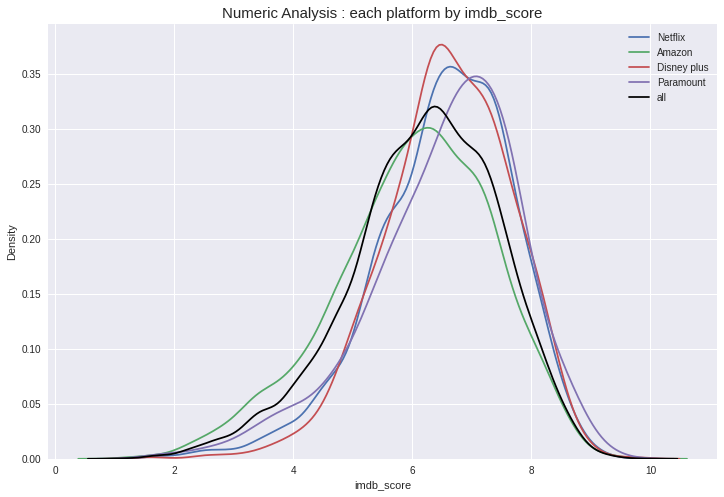

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.title('Numeric Analysis : each platform by imdb_score', size=15)


for uni, plat in zip(uni_plat, platforms):
  sns.distplot(uni['imdb_score'], hist=False, ax=ax, label=plat)

sns.distplot(df_title['imdb_score'], hist=False, ax=ax, color='black', label='all')
plt.legend()
plt.show()

In [23]:
for uni in uni_plat:
  print(uni['tmdb_score'].describe())
  print(); print()

count    4870.000000
mean        6.807598
std         1.144191
min         1.000000
25%         6.100000
50%         6.900000
75%         7.500000
max        10.000000
Name: tmdb_score, dtype: float64


count    5795.000000
mean        6.070440
std         1.515921
min         0.800000
25%         5.300000
50%         6.100000
75%         7.000000
max        10.000000
Name: tmdb_score, dtype: float64


count    1049.000000
mean        6.980458
std         1.056084
min         1.000000
25%         6.300000
50%         7.000000
75%         7.700000
max        10.000000
Name: tmdb_score, dtype: float64


count    798.000000
mean       6.822807
std        1.434546
min        1.000000
25%        6.100000
50%        7.000000
75%        7.700000
max       10.000000
Name: tmdb_score, dtype: float64




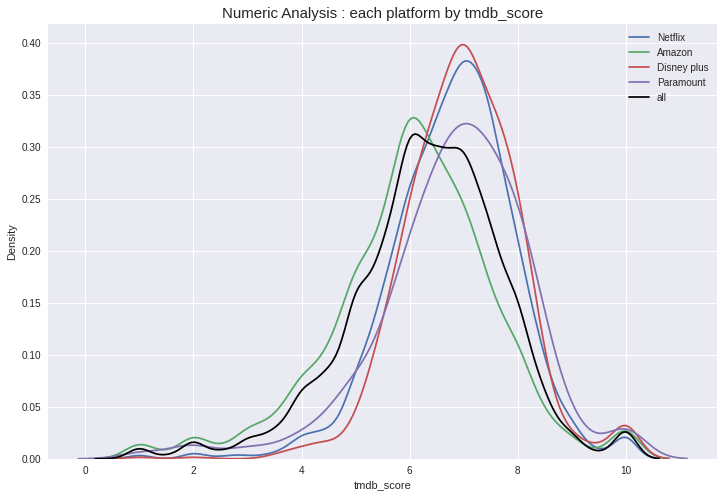

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.title('Numeric Analysis : each platform by tmdb_score', size=15)


for uni, plat in zip(uni_plat, platforms):
  sns.distplot(uni['tmdb_score'], hist=False, ax=ax, label=plat)

sns.distplot(df_title['tmdb_score'], hist=False, ax=ax, color='black', label='all')
plt.legend()
plt.show()

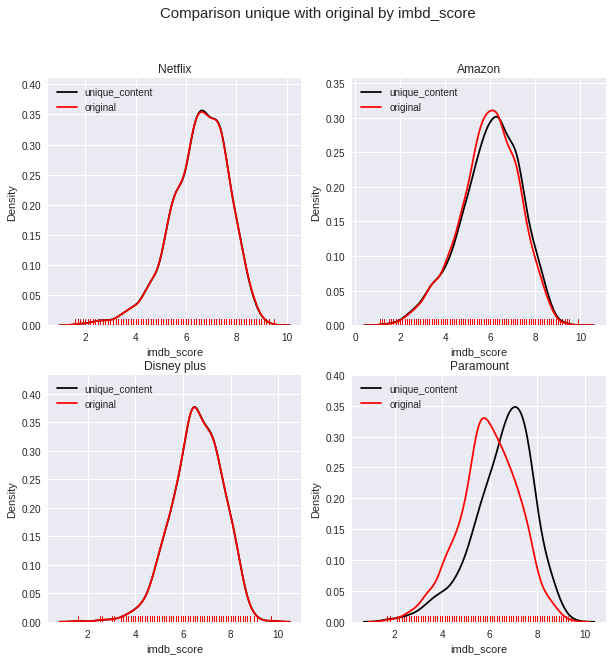

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.flatten()
plt.suptitle('Comparison unique with original by imbd_score', size=15)

for idx, (uni, platform) in enumerate(zip(uni_plat, platforms)):
  ax[idx].set_title(platform, size=12)
  # print(uni.shape)
  sns.distplot(uni['imdb_score'], rug=True, hist=False, ax=ax[idx], label='unique_content', color='black')
  sns.distplot(df_title[df_title['Platform'] == platform]['imdb_score'], rug=True, hist=False, ax=ax[idx], label='original', color='red')
  ax[idx].legend()

plt.show()

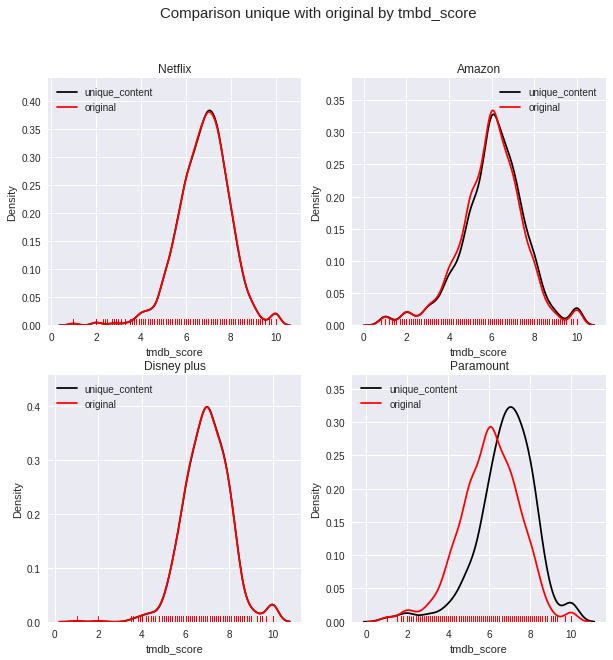

In [26]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.flatten()
plt.suptitle('Comparison unique with original by tmbd_score', size=15)

for idx, (uni, platform) in enumerate(zip(uni_plat, platforms)):
  ax[idx].set_title(platform, size=12)
  sns.distplot(uni['tmdb_score'], rug=True, hist=False, ax=ax[idx], label='unique_content', color='black')
  sns.distplot(df_title[df_title['Platform'] == platform]['tmdb_score'], rug=True, hist=False, ax=ax[idx], label='original', color='red')
  ax[idx].legend()

plt.show()

In [27]:
df_uni = pd.concat(uni_plat).reset_index(drop=True)
df_uni.shape

(12512, 16)

In [28]:
df_uni.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Platform
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],0.0,tt0075314,8.3,795222.0,27.612,8.2,Netflix
1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],0.0,tt0071853,8.2,530877.0,18.216,7.8,Netflix
2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],0.0,tt0079470,8.0,392419.0,17.505,7.8,Netflix
3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],0.0,tt0070047,8.1,391942.0,95.337,7.7,Netflix
4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,12.919,8.3,Netflix


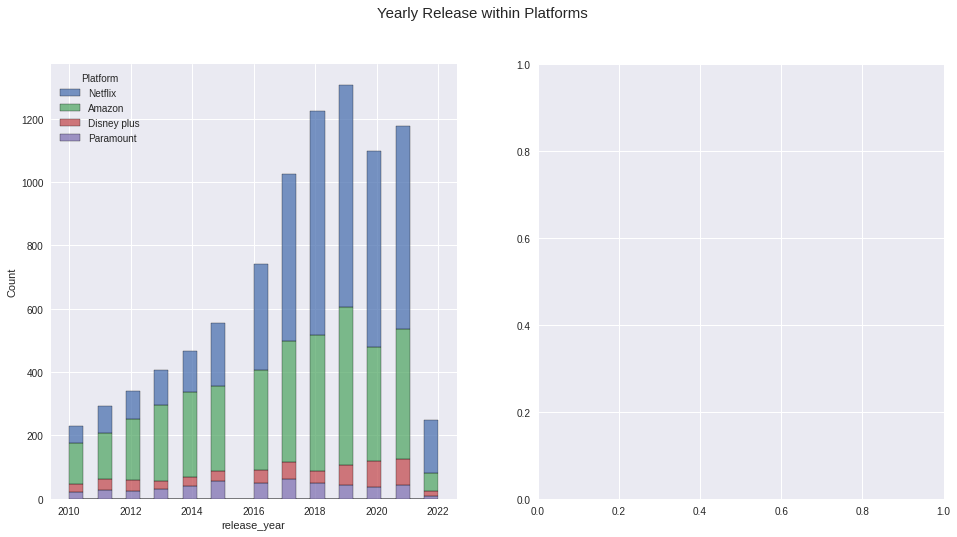

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
plt.suptitle('Yearly Release within Platforms', size=15)

sns.histplot(data=df_uni[df_uni['release_year'] >= 2010], x='release_year', hue='Platform', ax=ax[0], multiple='stack')
# sns.histplot(data=df_uni[df_uni['release_year'] >= 2010], x='release_year', hue='Platform', ax=ax[1], cumulative=True, multiple='stack')
plt.show()

In [30]:
# b=df_uni[['Platform', 'release_year', 'a']].groupby(by=['Platform', 'release_year']).count()
# sns.lineplot(b)

In [31]:
# plt.plot(df_uni[['release_year', 'Platform']][df_uni['release_year'] >= 2010], x='release_year')
# plt.show()

In [32]:
a = df_uni
a['a'] = df_uni['release_year']

In [33]:
# fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# ax.set_title('Yearly Release within Platforms', size=15)

# sns.lineplot(df_uni[['release_year', 'Platform'].groupby(by=['Platform'].sum())], x='release_year', hue='Platform')
# plt.show()

In [34]:
df_uni[['release_year', 'Platform']].groupby(by=['release_year']).count()

,Platform
release_year,
1915,4
1917,1
1918,1
1920,3
1921,4
...,...
2018,1224
2019,1308
2020,1098


In [35]:
df_uni.duplicated(subset=['Platform', 'release_year']).sum()

12182

In [36]:
# from pandas_profiling import ProfileReport

# titlesReport = ProfileReport(df_title, title="Pandas Profiling Report", explorative=True)
# titlesReport.to_notebook_iframe()

In [37]:
df_title.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Platform
0,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,G,120,"['animation', 'family', 'music', 'fantasy']",['US'],0.0,tt0032455,7.7,94681.0,57.751,7.4,Disney plus
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,"A beautiful girl, Snow White, takes refuge in ...",1937,G,83,"['fantasy', 'family', 'romance', 'animation', ...",['US'],0.0,tt0029583,7.6,195321.0,107.137,7.1,Disney plus
2,tm82546,Pinocchio,MOVIE,Lonely toymaker Geppetto has his wishes answer...,1940,G,88,"['animation', 'comedy', 'family', 'fantasy']",['US'],0.0,tt0032910,7.5,141937.0,71.160,7.1,Disney plus
3,tm79357,Bambi,MOVIE,Bambi's tale unfolds from season to season as ...,1942,G,70,"['animation', 'drama', 'family']",['US'],0.0,tt0034492,7.3,140406.0,68.136,7.0,Disney plus
4,tm62671,Treasure Island,MOVIE,Enchanted by the idea of locating treasure bur...,1950,PG,96,"['family', 'action']","['GB', 'US']",0.0,tt0043067,6.9,8229.0,10.698,6.5,Disney plus


In [38]:
df_title.shape

(15671, 16)

In [39]:
path = "/content/drive/MyDrive/Colab Notebooks/Datatone"
dir = [i for i in os.listdir(path) if '.csv' not in i]
dir

['Amazon', 'Netflix', 'Paramount', 'Disney plus']

In [40]:
def count(ls):
  for ele in ls:
    if ele in c:
      c[ele] += 1
      continue
    c[ele] = 1  

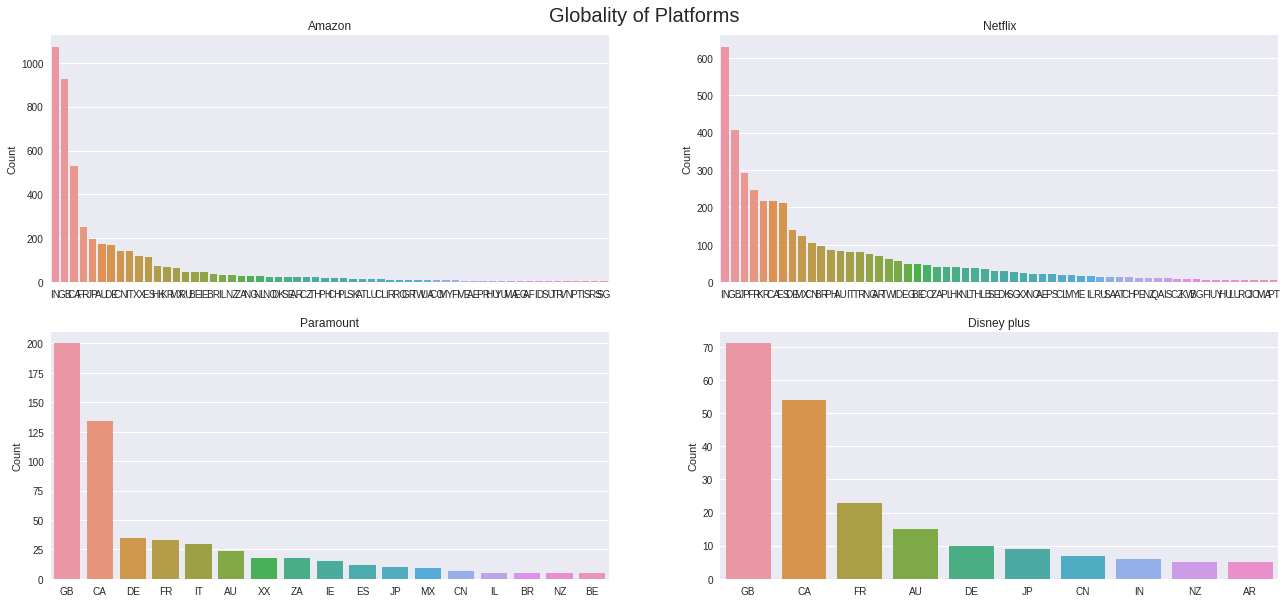

In [41]:
ls_globality = []
ls_data = []

fig, ax = plt.subplots(2, 2, figsize=(22, 10))
ax = ax.flatten()
plt.suptitle('Globality of Platforms', size=20, y=0.92)

for idx, platform in enumerate(dir):
  path_ = os.path.join(path, platform, 'titles.csv')
  data = pd.read_csv(path_).drop_duplicates()

  p = re.compile(r'[A-Z]+')
  data['production_countries'] = data['production_countries'].apply(lambda x: p.findall(x))
  ls_data.append(data)

  c = {}
  data['production_countries'].apply(count)

  globality = pd.DataFrame(list(c.items()), columns=['Country', 'Count']).sort_values(by='Count', ascending=False).iloc[1:].reset_index(drop=True)
  globality_ = globality[globality['Count'] >= 5]
  ls_globality.append(globality)

  ax[idx].set_title(platform, size=12)
  sns.barplot(data=globality_, x='Country', y='Count', ax=ax[idx]).set_xlabel('')

In [42]:
cnt_ctry_platf = []

for ele in ls_globality:
  cnt_ctry_platf.append(ele.shape[0])

cnt_ctry_platf

[118, 106, 61, 42]

In [43]:
final = []

for cnt, data in zip(cnt_ctry_platf, ls_data):
  m = data['imdb_score'].mean() + data['tmdb_score'].mean()
  m /= 2

  final.append(cnt*m)
final

[705.6784094762478, 707.628771979709, 368.6959274919954, 283.95116012070804]

In [44]:
def rating(ls):
  result = []

  max = np.max(ls)

  for i in ls:
    a = i
    a /= max
    a = np.round(a, 2)
    result.append(a)

  M = np.max(result)
  weight = 10/M

  for idx, val in enumerate(result):
    result[idx] = val * weight
  return result

In [45]:
score = rating(final)

In [46]:
final = dict(zip(dir, score))
final

{'Amazon': 10.0, 'Disney plus': 4.0, 'Netflix': 10.0, 'Paramount': 5.2}

In [47]:
dict_duplic = {key: [] for key in list(set(df_title['id']))}

for key in dict_duplic:
  dict_duplic[key] = list(df_title[df_title['id'] == key]['Platform'])

In [48]:
ls = [[] for _ in range(3)]

for key, val in dict_duplic.items():
  if len(val) == 2:
    ls[0].append(key)
  elif len(val) == 3:
    ls[1].append(key)
  elif len(val) == 4:
    ls[2].append(key)

In [49]:
print(len(dict_duplic))

for i in ls:
  print(len(i))

14087
1566
9
0


In [50]:
df_title[df_title['id'].isin(ls[0])]['release_year'].describe()

count    3132.000000
mean     1980.777778
std        32.750079
min      1912.000000
25%      1947.000000
50%      1985.000000
75%      2014.000000
max      2022.000000
Name: release_year, dtype: float64

In [51]:
df_title[df_title['id'].isin(ls[1])]['release_year'].describe()

count      27.000000
mean     2003.111111
std         8.798310
min      1993.000000
25%      1996.000000
50%      2002.000000
75%      2006.000000
max      2018.000000
Name: release_year, dtype: float64

In [54]:
ls_data[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9868 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9868 non-null   object 
 1   title                 9868 non-null   object 
 2   type                  9868 non-null   object 
 3   description           9749 non-null   object 
 4   release_year          9868 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9868 non-null   int64  
 7   genres                9868 non-null   object 
 8   production_countries  9868 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9201 non-null   object 
 11  imdb_score            8847 non-null   float64
 12  imdb_votes            8837 non-null   float64
 13  tmdb_popularity       9321 non-null   float64
 14  tmdb_score            7788 non-null   float64
dtypes: float64(5), int64(

In [55]:
df_title.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Platform
0,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,G,120,"['animation', 'family', 'music', 'fantasy']",['US'],0.0,tt0032455,7.7,94681.0,57.751,7.4,Disney plus
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,"A beautiful girl, Snow White, takes refuge in ...",1937,G,83,"['fantasy', 'family', 'romance', 'animation', ...",['US'],0.0,tt0029583,7.6,195321.0,107.137,7.1,Disney plus
2,tm82546,Pinocchio,MOVIE,Lonely toymaker Geppetto has his wishes answer...,1940,G,88,"['animation', 'comedy', 'family', 'fantasy']",['US'],0.0,tt0032910,7.5,141937.0,71.160,7.1,Disney plus
3,tm79357,Bambi,MOVIE,Bambi's tale unfolds from season to season as ...,1942,G,70,"['animation', 'drama', 'family']",['US'],0.0,tt0034492,7.3,140406.0,68.136,7.0,Disney plus
4,tm62671,Treasure Island,MOVIE,Enchanted by the idea of locating treasure bur...,1950,PG,96,"['family', 'action']","['GB', 'US']",0.0,tt0043067,6.9,8229.0,10.698,6.5,Disney plus
